# CMP 414/765 Mid-Term Project

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg" width="300">

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although where was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

For the mid-term project, we will work with the [Titanic dataset](https://www.kaggle.com/c/titanic) on Kaggle.com. In this project, you will get to apply machine learning tools to analyze the passenger information from the training set, and analyze what factors may affect a passenger's chance for survival. **You are expected to submit a complete Jupyter notebook with python code (including detailed comments), numerical results, and graphs (with proper labeling) to Blackboard.** The submission deadline is **Sunday, November 13th**.


# Stage I: Data Exploration


(1) Download the training data from https://www.kaggle.com/c/titanic/data as a CSV file.

(2) Load the training dataset as a Pandas DataFrame.

In [ ]:
# Mohamed Irsath Abdul Azeez

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix
%matplotlib inline

data = pd.read_csv("train.csv")
# d = data

(3) Obtain basic information of variables. For each variable, find out:
1. What does this variable represent
2. The meaning of values
3. Numerical summary
4. Graphical distributions of values


In [ ]:
print("Columns name: ",data.columns)

# PassengerId = passenger id represent identification number for each passenger - index value from 1 - 890
# Pclass = class catagories for passenger - value of class 1,2,or 3
# Name = Name of the passenger - not a numeric value
# Sex = Gender of the passenger -  not a numeric value
# Age = Age of the passenger  -  numbers represent the age of person
# SibSp = Sibling with spouse - number of people who has spouse of siblings
# parch = parents with childeren -  number of parents with children
# Ticket = ticket Number of passenger - not a numeric value
# Fare = fare of the passenger - value represent the amount they paid for travel
# Cabin = cabin room assigned for passenger - not a numeric value
# Embarked = boarded point of passenger (s- Southamton, Q- qeenstown, C- cherbourg) - not a numerical value

data.describe()

Columns name:  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


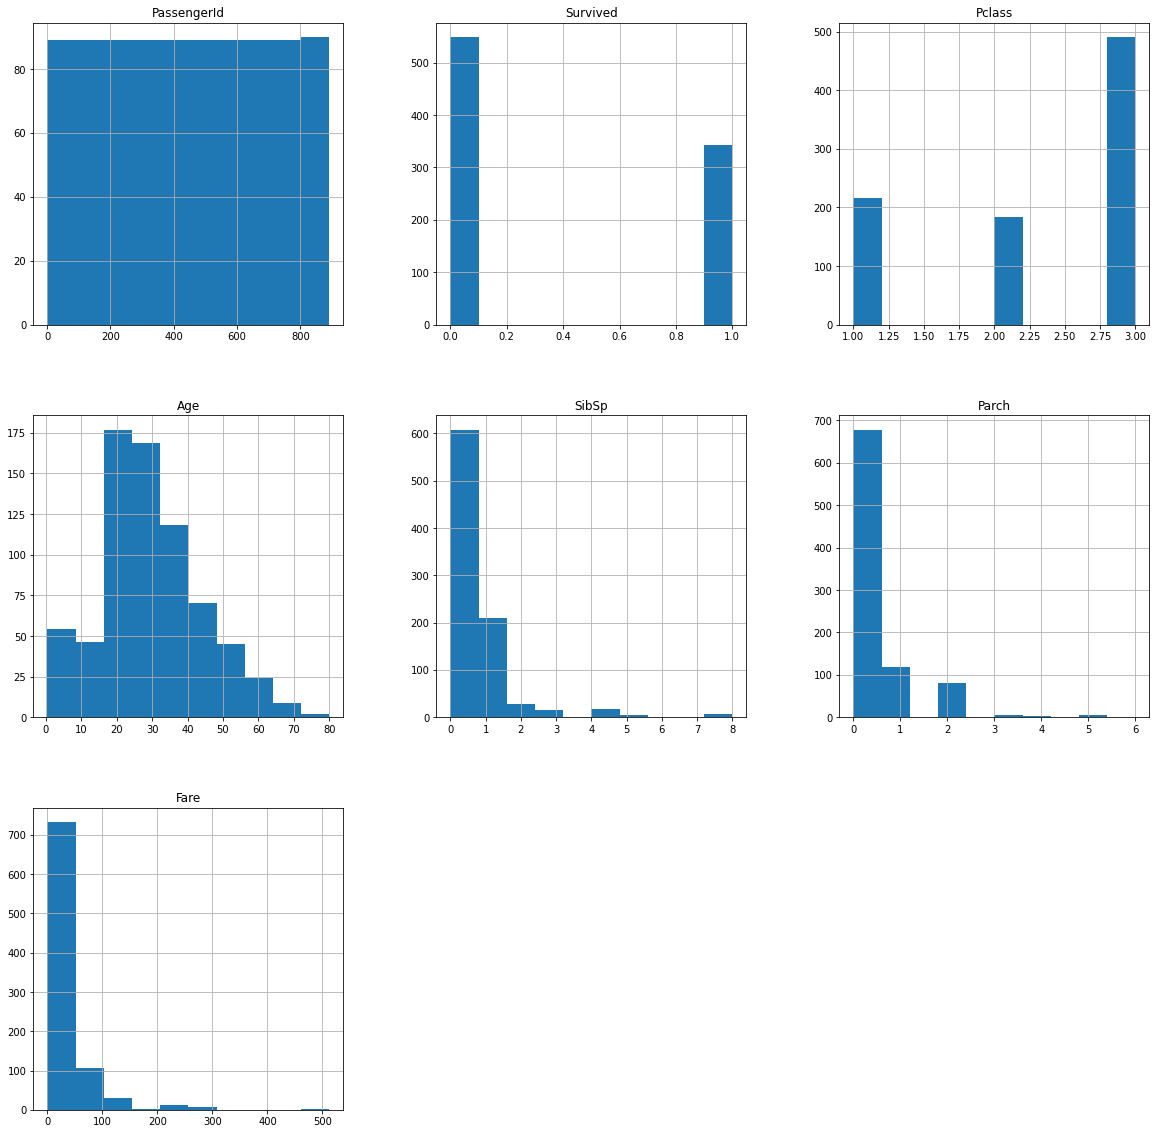

In [ ]:
data.hist(figsize=(20,20))
plt.show()
# this shows only numerical value distribution of the data frame

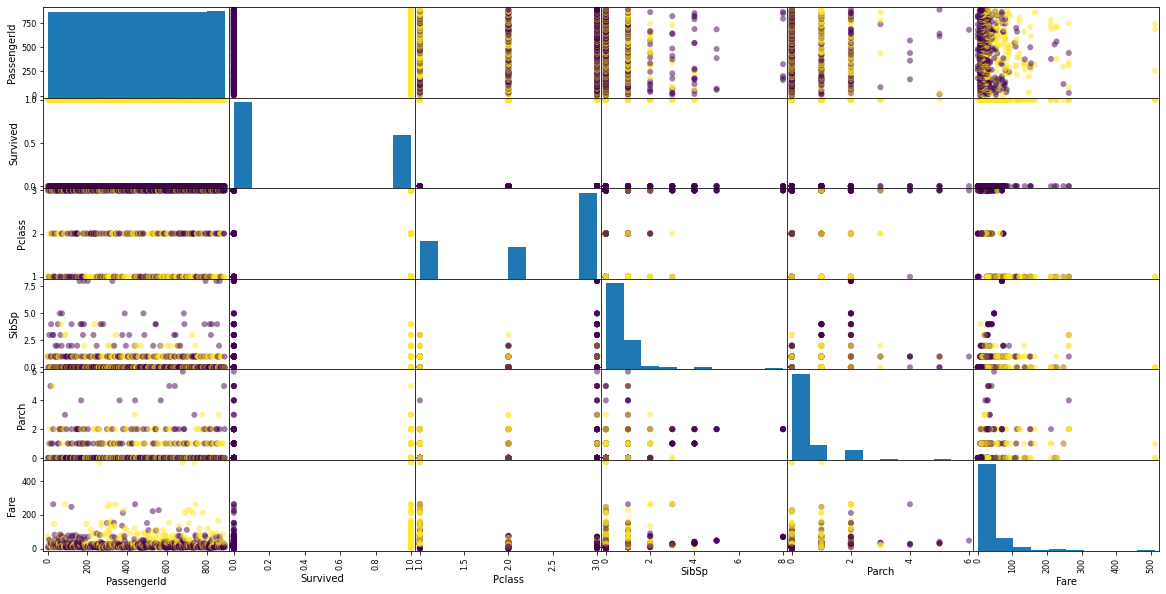

In [ ]:
a = data
a = a.drop('Age', axis=1) # in order to plot scatter, we have to drop the age column which is not sufficient to represent the color
scatter_matrix(a, figsize = (20,10), marker='o', c = data['Survived'])
plt.show()

(4) Data Cleaning

Discard all passengers with incomplete information may significantly reduce the number of data example. Please handle the missing value problem in the following way:
1. Remove all columns that contain more than 5% missing values.
2. After Step 1, remove any row that has missing values.



In [ ]:
print(data.isnull().sum())
data = data.drop('Age', axis = 1)
data.describe()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [ ]:

list_cabin = []


m = data['Cabin']

for val in m.index:
  if m.loc[val] is np.NAN:
    list_cabin.append(0)
  else:
    list_cabin.append(1)

data['Cabin'] = list_cabin


for val in data.index:
  if data.loc[val, 'Embarked'] is np.NAN:
    # print(val)
    data = data.drop(val, axis=0)

print("After cleaning Data\n----------------\n",data.isnull().sum())
data

After cleaning Data
----------------
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,1,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,1,C


In [ ]:

# resetting the index because 2 rows been deleted already

data = data.reset_index(drop=True)
data.index


RangeIndex(start=0, stop=889, step=1)

(5) Prediction Power
A good model should only include variables that are indeed related to the task. Use correlation coefficients and scatter plots to decide which variables have strong relationship to passengers’ survival, and which don’t.


In [ ]:
data.corr()


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Cabin
PassengerId,1.000000,-0.005028,-0.035330,-0.057686,-0.001657,0.012703,0.020045
Survived,-0.005028,1.000000,-0.335549,-0.034040,0.083151,0.255290,0.313435
Pclass,-0.035330,-0.335549,1.000000,0.081656,0.016824,-0.548193,-0.723815
SibSp,-0.057686,-0.034040,0.081656,1.000000,0.414542,0.160887,-0.038657
Parch,-0.001657,0.083151,0.016824,0.414542,1.000000,0.217532,0.039101
Fare,0.012703,0.255290,-0.548193,0.160887,0.217532,1.000000,0.480425
Cabin,0.020045,0.313435,-0.723815,-0.038657,0.039101,0.480425,1.000000


In [ ]:
data = data.drop('PassengerId', axis=1)
data = data.drop('SibSp', axis=1)
data = data.drop('Parch', axis=1)

In [ ]:
data

,Survived,Pclass,Name,Sex,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,A/5 21171,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...
884,0,2,"Montvila, Rev. Juozas",male,211536,13.0000,0,S
885,1,1,"Graham, Miss. Margaret Edith",female,112053,30.0000,1,S
886,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,23.4500,0,S
887,1,1,"Behr, Mr. Karl Howell",male,111369,30.0000,1,C


(6) (optional) You may think that the name feature is irrelevant. However, a closer look at the names will show that some passengers have rare titles such as Dr., Mme, or Master., which indicates their high social status. Please create a column to indicate whether a passenger has a rare title.

In [ ]:

h = []

for string in data['Name']:
  if string.lower().find('Dr.'.lower()) != -1 or\
   string.lower().find('Master.'.lower()) != -1 or \
   string.lower().find('Mme.'.lower()) != -1:
    h.append(1)
    # print(string)
  else:
    h.append(0)


data['VIP'] = h


frame = data

frame = frame.drop('Name', axis=1)
frame = frame.drop('Ticket', axis = 1)

##########
u = []
for val in frame['Fare']:
  if val > 0:
    u.append(1)
  else:
    u.append(0)

frame['paid'] = u
# print(frame['VIP'].value_counts())
frame


,Survived,Pclass,Sex,Fare,Cabin,Embarked,VIP,paid
0,0,3,male,7.2500,0,S,0,1
1,1,1,female,71.2833,1,C,0,1
2,1,3,female,7.9250,0,S,0,1
3,1,1,female,53.1000,1,S,0,1
4,0,3,male,8.0500,0,S,0,1
...,...,...,...,...,...,...,...,...
884,0,2,male,13.0000,0,S,0,1
885,1,1,female,30.0000,1,S,0,1
886,0,3,female,23.4500,0,S,0,1
887,1,1,male,30.0000,1,C,0,1


In [ ]:

frame.head()




,Survived,Pclass,Sex,Fare,Cabin,Embarked,VIP,paid
0,0,3,male,7.2500,0,S,0,1
1,1,1,female,71.2833,1,C,0,1
2,1,3,female,7.9250,0,S,0,1
3,1,1,female,53.1000,1,S,0,1
4,0,3,male,8.0500,0,S,0,1


## Stage II: Model Construction

(1) Converting Categorical Features

1. Sex in the original dataset is categorial, and thus cannot be directly fed into Machine Learning models. Please convert the categories into 0’s and 1’s.
2. Embarked is also categorical. However, it is not ideal to simply convert the three categories into 0, 1, and 2, since it creates a bias by imposing an order to the values. Instead, we can add an indicator variable (also known as a dummy variable) for each category separately. Please replace the Embarked variable with three variables – Embarked_S, Embarked_C, and Embarked_Q – to indicate the place a passenger boarded the ship. For example, if a passenger boarded from Southamptons, Embarked_S should be set to 1, and Embarked_C and Embarked_Q should be zero. ([pandas.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) can help you with this)


In [ ]:

list_gender = []

for index in frame.index:
  if frame.loc[index, 'Sex'] ==  'male':
    list_gender.append(1)
  else:
    list_gender.append(0)


frame['Sex'] = list_gender

frame = pd.get_dummies(frame, columns=["Embarked"])

In [ ]:
frame.head()


,Survived,Pclass,Sex,Fare,Cabin,VIP,paid,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,7.2500,0,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,1,0,0
2,1,3,0,7.9250,0,0,1,0,0,1
3,1,1,0,53.1000,1,0,1,0,0,1
4,0,3,1,8.0500,0,0,1,0,0,1


In [ ]:
frame.corr()

,Survived,Pclass,Sex,Fare,Cabin,VIP,paid,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.541585,0.255290,0.313435,0.088509,0.085125,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.127741,-0.548193,-0.723815,0.024126,0.059400,-0.245733,0.220558,0.076466
Sex,-0.541585,0.127741,1.000000,-0.179958,-0.135589,0.154819,-0.096334,-0.084520,-0.075217,0.121405
Fare,0.255290,-0.548193,-0.179958,1.000000,0.480425,0.026150,0.084656,0.270731,-0.116684,-0.163758
Cabin,0.313435,-0.723815,-0.135589,0.480425,1.000000,0.001109,0.008510,0.211375,-0.128805,-0.104121
VIP,0.088509,0.024126,0.154819,0.026150,0.001109,1.000000,0.031298,-0.013614,0.014909,0.002544
paid,0.085125,0.059400,-0.096334,0.084656,0.008510,0.031298,1.000000,0.063238,0.040342,-0.080803
Embarked_C,0.169966,-0.245733,-0.084520,0.270731,0.211375,-0.013614,0.063238,1.000000,-0.148646,-0.782613
Embarked_Q,0.004536,0.220558,-0.075217,-0.116684,-0.128805,0.014909,0.040342,-0.148646,1.000000,-0.499261
Embarked_S,-0.151777,0.076466,0.121405,-0.163758,-0.104121,0.002544,-0.080803,-0.782613,-0.499261,1.000000


In [ ]:
frame

,Survived,Pclass,Sex,Fare,Cabin,VIP,paid,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,7.2500,0,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,1,0,0
2,1,3,0,7.9250,0,0,1,0,0,1
3,1,1,0,53.1000,1,0,1,0,0,1
4,0,3,1,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,13.0000,0,0,1,0,0,1
885,1,1,0,30.0000,1,0,1,0,0,1
886,0,3,0,23.4500,0,0,1,0,0,1
887,1,1,1,30.0000,1,0,1,1,0,0


(2) Feature Scaling

Machine learning models usually work best on datasets whose variables have similar ranges. Please scale each variable so that it has zero mean and unit variance (sklearn.preprocessing.StandardScaler() can help you with this).

In [ ]:


input = [val for val in frame.columns if val != 'Survived']

train_set, valid_set, train_y, valid_y = \
train_test_split(frame[input], frame['Survived'], test_size=0.2)

# Standard Scaler
scale = StandardScaler()
scale.fit(train_set)
train_stand = scale.transform(train_set)
valid_stand = scale.transform(valid_set)

train_stand = pd.DataFrame(train_stand, columns= train_set.columns)
valid_stand = pd.DataFrame(valid_stand, columns= train_set.columns)

# Min Max Scaler (optional...)

scaler = MinMaxScaler()
scaler.fit(train_set)
train_minmax = scaler.transform(train_set)
valid_minmax = scaler.transform(valid_set)

train_minmax = pd.DataFrame(train_minmax, columns= train_set.columns)
valid_minmax = pd.DataFrame(valid_minmax, columns= train_set.columns)


train_stand.describe().round(2)


,Pclass,Sex,Fare,Cabin,VIP,paid,Embarked_C,Embarked_Q,Embarked_S
count,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00,711.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.59,-1.34,-0.66,-0.54,-0.25,-7.63,-0.49,-0.31,-1.62
25%,-0.39,-1.34,-0.49,-0.54,-0.25,0.13,-0.49,-0.31,-1.62
50%,0.81,0.75,-0.36,-0.54,-0.25,0.13,-0.49,-0.31,0.62
75%,0.81,0.75,-0.01,-0.54,-0.25,0.13,-0.49,-0.31,0.62
max,0.81,0.75,10.11,1.84,4.04,0.13,2.06,3.26,0.62


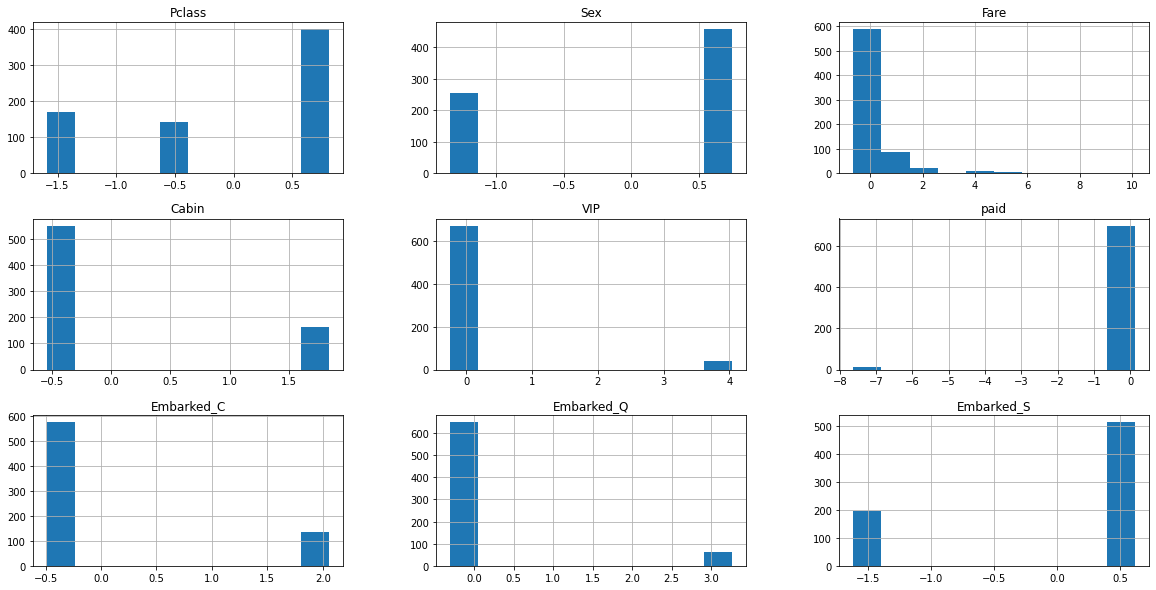

In [ ]:
train_stand.hist(figsize=(20,10))
plt.show()

(3) Extract Validation set

Because the test dataset from the website has no information on survival, it cannot be used to evaluate the performance of the model. As a result, we need to further split the data in train.csv into training set (80%) and validation set (20%). We will use training set to build the models, and use validation set to evaluate them. (`sklearn.model_selection.train_test_split()` can help you with this)

In [ ]:
# I have answered this question above splitting the data set

(4) (Optional: Feature Engineering)

Previously we noticed that some passengers’ names have rare titles, which may indicate their unusual social status. Extracting a new feature from existing data is called feature engineering. Another interesting thing you may observed is that some passenger got on board for free! This could also be a potential indicator of the social status of the passenger. Please create an indicator variable on whether a person paid for the ticket.

In [ ]:
# i have answered above for this question the column under 'paid'
print(frame['paid'].value_counts())
frame.head()

1    874
0     15
Name: paid, dtype: int64


,Survived,Pclass,Sex,Fare,Cabin,VIP,paid,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,7.2500,0,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,1,0,0
2,1,3,0,7.9250,0,0,1,0,0,1
3,1,1,0,53.1000,1,0,1,0,0,1
4,0,3,1,8.0500,0,0,1,0,0,1


(5) Building Models

So far, we have learned five models: linear regression, polynomial regression, logistic regression, k-nearest neighbors method, and linear support vector machine. Choose at least two models that are suitable for this problem and use corresponding sklearn classes to fit the data. Note that each model class has several parameters, you are welcome to change the default parameter values and try to improve the performance of the model.


In [ ]:

# Logistic Regression
model1 = LogisticRegression(solver='saga')
# model1.fit(train_set, train_y)
# prediction = model1.predict(valid_set)
# actual = valid_y
# accuracy = accuracy_score(actual, prediction)
# print(accuracy)



model1.fit(train_stand, train_y)
prediction = model1.predict(valid_stand)
actual = valid_y
accuracy = accuracy_score(actual, prediction)
x = cross_val_score(model1, train_stand, train_y, cv=5 )
print("Logistic Regression\n")
print("Using standard scaling set:>")
print("Cross validation score: ",x)
print("Confusion Matrix: ")
print(confusion_matrix(actual, prediction))
print("Accuracy score: ", accuracy_score(actual, prediction))
print("Precision score: ", precision_score(actual, prediction))
print("recall score: ", recall_score(actual, prediction))
print("\n\n")

print("Using minmax scaling set:>")
model1.fit(train_minmax, train_y)
prediction = model1.predict(valid_minmax)
actual = valid_y
accuracy = accuracy_score(actual, prediction)
x = cross_val_score(model1, train_minmax, train_y, cv=5 )
print("Cross validation score: ",x)
print("Confusion Matrix: ")
print(confusion_matrix(actual, prediction))
print("Accuracy score: ", accuracy_score(actual, prediction))
print("Precision score: ", precision_score(actual, prediction))
print("recall score: ", recall_score(actual, prediction))
print("\n\n")


Logistic Regression

Using standard scaling set:>
Cross validation score:  [0.79020979 0.76056338 0.79577465 0.8028169  0.80985915]
Confusion Matrix: 
[[96 19]
 [14 49]]
Accuracy score:  0.8146067415730337
Precision score:  0.7205882352941176
recall score:  0.7777777777777778



Using minmax scaling set:>
Cross validation score:  [0.79020979 0.76056338 0.77464789 0.8028169  0.8028169 ]
Confusion Matrix: 
[[96 19]
 [14 49]]
Accuracy score:  0.8146067415730337
Precision score:  0.7205882352941176
recall score:  0.7777777777777778





In [ ]:
########### Support Vector Machine
model2 = LinearSVC()
# model2.fit(train_set, train_y)
# prediction = model2.predict(valid_set)
# actual = valid_y
# accuracy = accuracy_score(actual, prediction)
# print(accuracy)
print("Linear Support Vector machine\n")
print("Using standard scaling set:>")
model2.fit(train_stand, train_y)
prediction = model2.predict(valid_stand)
actual = valid_y
accuracy = accuracy_score(actual, prediction)
x = cross_val_score(model2, train_stand, train_y, cv=5 )
print("Cross validation score: ",x)
print("Confusion Matrix: ")
print(confusion_matrix(actual, prediction))
print("Accuracy score: ", accuracy_score(actual, prediction))
print("Precision score: ", precision_score(actual, prediction))
print("recall score: ", recall_score(actual, prediction))
print("\n\n")

model2.fit(train_minmax, train_y)
prediction = model2.predict(valid_minmax)
actual = valid_y
accuracy = accuracy_score(actual, prediction)
x = cross_val_score(model2, train_minmax, train_y, cv=5 )
print("Using minmax scaling set:>")
print("Cross validation score: ",x)
print("Confusion Matrix: ")
print(confusion_matrix(actual, prediction))
print("Accuracy score: ", accuracy_score(actual, prediction))
print("Precision score: ", precision_score(actual, prediction))
print("recall score: ", recall_score(actual, prediction))
print("\n\n")


Linear Support Vector machine

Using standard scaling set:>


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Cross validation score:  [0.79020979 0.76760563 0.77464789 0.81690141 0.82394366]
Confusion Matrix: 
[[100  15]
 [ 18  45]]
Accuracy score:  0.8146067415730337
Precision score:  0.75
recall score:  0.7142857142857143



Using minmax scaling set:>
Cross validation score:  [0.79020979 0.76760563 0.77464789 0.81690141 0.81690141]
Confusion Matrix: 
[[100  15]
 [ 18  45]]
Accuracy score:  0.8146067415730337
Precision score:  0.75
recall score:  0.7142857142857143





In [ ]:
########### Kneighbour
model3 = KNeighborsClassifier(n_neighbors=3)
# model3.fit(train_set, train_y)
# prediction = model3.predict(valid_set)
# actual = valid_y
# accuracy = accuracy_score(actual, prediction)
# print(accuracy)

print("K nearest neigbour\n")
print("Using standard scaling set:>")

model3.fit(train_stand, train_y)
prediction = model3.predict(valid_stand)
actual = valid_y
accuracy = accuracy_score(actual, prediction)
x = cross_val_score(model3, train_stand, train_y, cv=5 )
print("Cross validation score: ",x)
print("Confusion Matrix: ")
print(confusion_matrix(actual, prediction))
print("Accuracy score: ", accuracy_score(actual, prediction))
print("Precision score: ", precision_score(actual, prediction))
print("recall score: ", recall_score(actual, prediction))
print("\n\n")


model3.fit(train_minmax, train_y)
prediction = model3.predict(valid_minmax)
actual = valid_y
accuracy = accuracy_score(actual, prediction)
x = cross_val_score(model3, train_minmax, train_y, cv=5 )
print("Using minmax scaling set:>")
print("Cross validation score: ",x)
print("Confusion Matrix: ")
print(confusion_matrix(actual, prediction))
print("Accuracy score: ", accuracy_score(actual, prediction))
print("Precision score: ", precision_score(actual, prediction))
print("recall score: ", recall_score(actual, prediction))
print("\n\n")


K nearest neigbour

Using standard scaling set:>
Cross validation score:  [0.78321678 0.77464789 0.72535211 0.83802817 0.78873239]
Confusion Matrix: 
[[99 16]
 [15 48]]
Accuracy score:  0.8258426966292135
Precision score:  0.75
recall score:  0.7619047619047619



Using minmax scaling set:>
Cross validation score:  [0.8041958  0.74647887 0.71126761 0.82394366 0.8028169 ]
Confusion Matrix: 
[[102  13]
 [ 17  46]]
Accuracy score:  0.8314606741573034
Precision score:  0.7796610169491526
recall score:  0.7301587301587301





In [ ]:
######### Linear Regression // i tried in this way for linear regression
model4 = LinearRegression()
print("Linear Regression\n")

model4.fit(train_stand, train_y)
prediction = model4.predict(valid_stand)
actual = valid_y
MSE = mean_squared_error(actual, prediction)

pred = []

for val in prediction:
  if val < 0.5:
    pred.append(0)
  else:
    pred.append(1)


accuracy = accuracy_score(actual,pred)
print("Accuracy: ",accuracy)
print("MSE: ",MSE)


Linear Regression

Accuracy:  0.8089887640449438
MSE:  0.1339036404739343


## Stage III: Model Selection and Interpretation

(1) Model Selection.

For each model you have trained, perform the following evaluations on the validation set:
1. cross validation
2. confusion matrix
3. precision, and recall

What is the best model?

In [ ]:
# based on the validation prediction we can achive 79 - 85 % accuracy therefore,
# I prefere to choose logistic regression and Linear vector machine model predict better
frame

,Survived,Pclass,Sex,Fare,Cabin,VIP,paid,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,7.2500,0,0,1,0,0,1
1,1,1,0,71.2833,1,0,1,1,0,0
2,1,3,0,7.9250,0,0,1,0,0,1
3,1,1,0,53.1000,1,0,1,0,0,1
4,0,3,1,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,13.0000,0,0,1,0,0,1
885,1,1,0,30.0000,1,0,1,0,0,1
886,0,3,0,23.4500,0,0,1,0,0,1
887,1,1,1,30.0000,1,0,1,1,0,0


(2) Model Interpretation.

Based on the model that you have selected, can you identify a few key variables that are important in predicting the survival of the passengers? Try to find out which characteristics can improve passengers’ chance of survival.


In [ ]:
# 1. Fare
# 2. Pclass
# 3. Sex
# 4. Cabin

# The person who pay fare, choice of class, female gender and occupied a cabin will improve the chance of survivabiliity

In [ ]:
# a = frame[(frame['Survived'] == 1) & (frame['paid'] == 0)] // testing purpose
# a['Survived'].sum() // testing




(3) (optional) Submit Results to Kaggle.com
Make predictions on the test set, submit your results to Kaggle.com.

In [ ]:
from pandas.core.api import notnull
test = pd.read_csv('test.csv')
test = test.drop(['PassengerId', 'SibSp', 'Parch', 'Ticket','Age'], axis=1)

test['Sex'] = [1 if val=='male' else 0 for val in test['Sex']]
test['Cabin'] = [1 if val is not np.NAN else 0 for val in test['Cabin']]
# test['Paid'].value_counts()

test['VIP'] = [1 if (val.lower().find('Master.'.lower()) != -1 or val.lower().find('Dr.'.lower()) \
                     != -1 or val.lower().find('Mme.'.lower()) != -1 )\
               else 0 for val in test['Name']]
test['paid'] = [1 if val>0 else 0 for val in test['Fare']]
test = pd.get_dummies(test, columns= ['Embarked'])

test = test.dropna()
test = test.reset_index(drop=True)
test.isnull().sum()
test = test.drop('Name', axis = 1)
test
scale = StandardScaler()
scale.fit(test)
test_scaled = scale.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns= test.columns)
test_scaled.describe().round(2)
predict = model1.predict(test_scaled)
print(predict)

[0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0
 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1
 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1
 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 0
 1 0 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1
 1 1 1 1 1 0 1 0 0 1]
